<a href="https://colab.research.google.com/github/TristanVenot/Mapimed/blob/main/Welcome_To_Colab.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [30]:
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from networkx.algorithms.community import greedy_modularity_communities

def generate_random_network(num_nodes=10, num_edges=5):
    # Create a random graph
    G = nx.gnm_random_graph(num_nodes, num_edges)
    # Adjacency matrix
    adj_matrix = nx.adjacency_matrix(G).todense()
    return G, adj_matrix



Plotting this network

In [33]:

def plot_network_2d(G):
    pos = nx.spring_layout(G)  # 2D layout
    plt.figure(figsize=(10, 10))
    nx.draw(G, pos, with_labels=True, node_color='skyblue', edge_color='gray', node_size=500, font_size=10)
    plt.title("2D Network Visualization")
    plt.show()

def plot_network_3d(G):
    pos = nx.spring_layout(G, dim=3)  # 3D layout
    fig = plt.figure(figsize=(10, 10))
    ax = fig.add_subplot(111, projection="3d")
    for node, (x, y, z) in pos.items():
        ax.scatter(x, y, z, color='skyblue', s=100)
        ax.text(x, y, z, str(node), fontsize=10, color='black')
    for (u, v) in G.edges():
        x = np.array([pos[u][0], pos[v][0]])
        y = np.array([pos[u][1], pos[v][1]])
        z = np.array([pos[u][2], pos[v][2]])
        ax.plot(x, y, z, color='gray')
    plt.title("3D Network Visualization")
    plt.show()


Getting properties of the network

In [ ]:

def calculate_metrics(G):
    # Global efficiency
    global_eff = nx.global_efficiency(G)
    # Modularity (using greedy modularity communities)
    communities = list(greedy_modularity_communities(G))
    modularity = nx.algorithms.community.quality.modularity(G, communities)
    # Density
    density = nx.density(G)
    # Node degree
    degree = dict(G.degree())
    # Node betweenness
    betweenness = nx.betweenness_centrality(G)
    return global_eff, modularity, density, degree, betweenness



Final Code

Adjacency Matrix:
[[0 1 0 0 0 1 1 0 1 0]
 [1 0 1 0 0 0 0 1 0 1]
 [0 1 0 0 0 0 0 0 1 0]
 [0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 1 1 0 0 0]
 [1 0 0 0 1 0 0 0 0 0]
 [1 0 0 0 1 0 0 0 0 0]
 [0 1 0 0 0 0 0 0 0 0]
 [1 0 1 0 0 0 0 0 0 0]
 [0 1 0 0 0 0 0 0 0 0]]


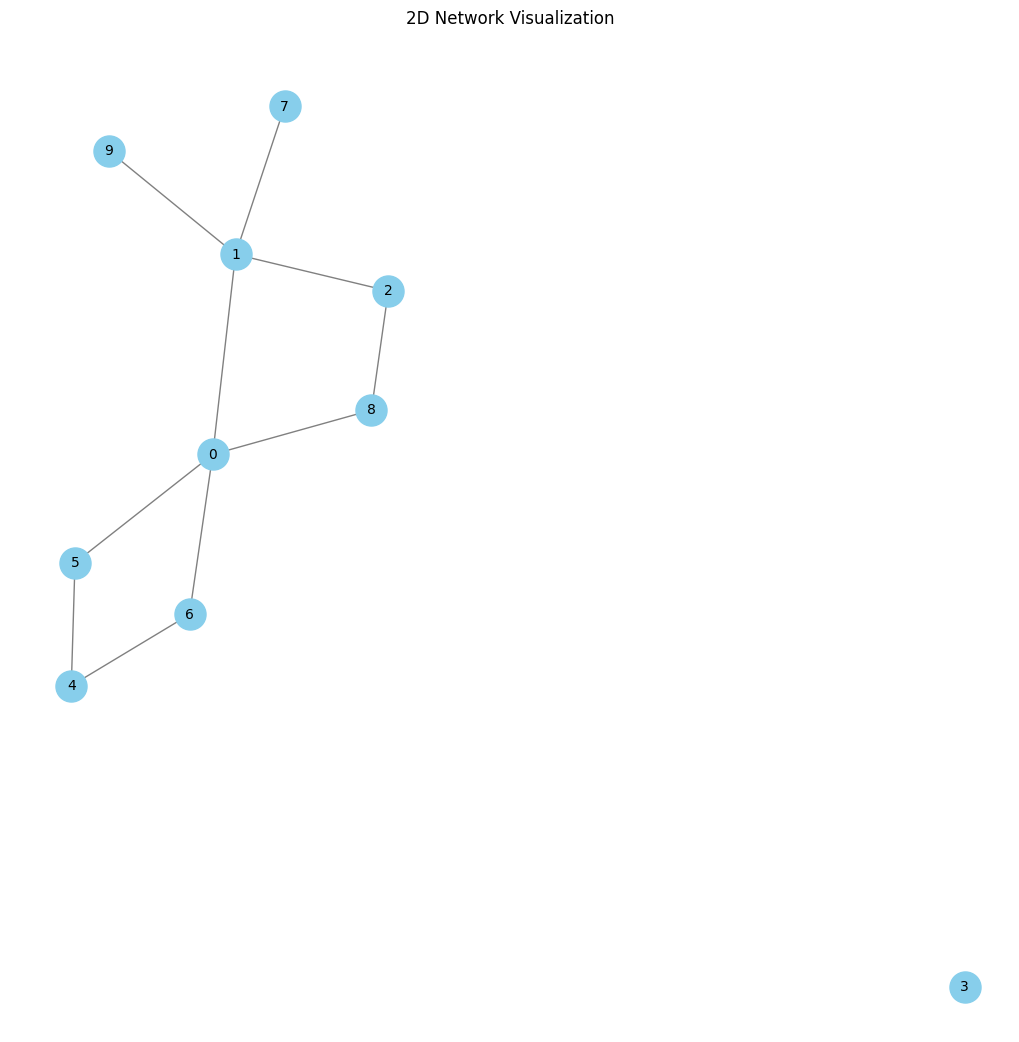

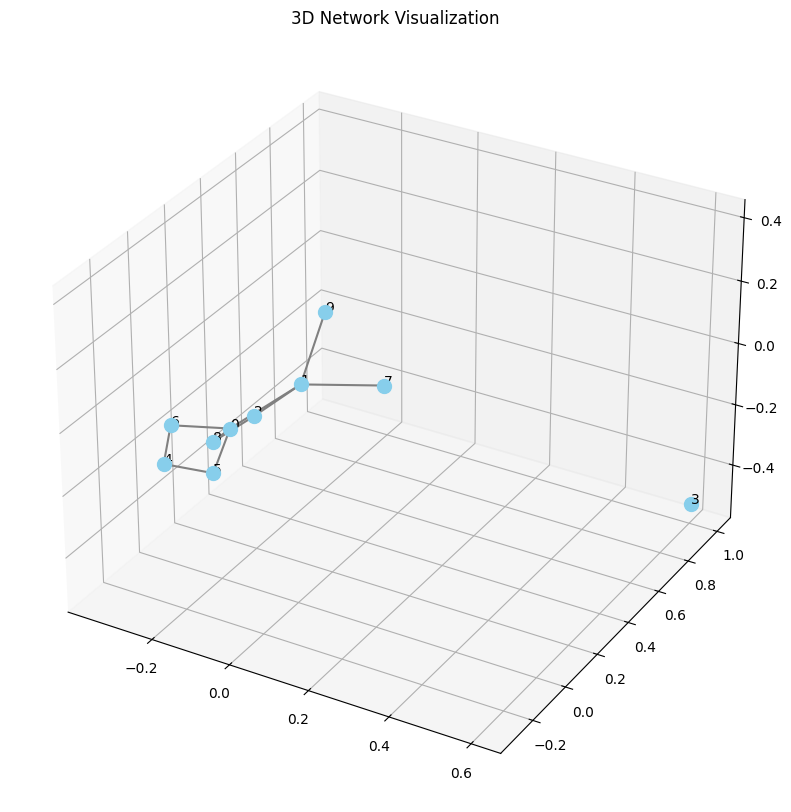

Global Efficiency: 0.4574074074074075
Modularity: 0.32
Density: 0.2222222222222222
Node Degrees:
{0: 4, 1: 4, 2: 2, 3: 0, 4: 2, 5: 2, 6: 2, 7: 1, 8: 2, 9: 1}
Node Betweenness Centrality:
{0: 0.4722222222222222, 1: 0.41666666666666663, 2: 0.041666666666666664, 3: 0.0, 4: 0.013888888888888888, 5: 0.08333333333333333, 6: 0.08333333333333333, 7: 0.0, 8: 0.05555555555555555, 9: 0.0}


In [ ]:
def main(num_nodes=10, num_edges=5):
    num_nodes = 10
    num_edges = 10
    G, adj_matrix = generate_random_network(num_nodes, num_edges)
    print("Adjacency Matrix:")
    print(adj_matrix)
    # plt.figure(figsize=(8, 6))
    # nx.draw(G, with_labels=True, node_color='lightblue', node_size=700, font_size=12, edge_color='gray')
    # plt.title("Network Visualization from Adjacency Matrix")
    # plt.show()
    # Plot the network in 2D and 3D
    plot_network_2d(G)
    plot_network_3d(G)

    # Calculate metrics
    global_eff, modularity, density, degree, betweenness = calculate_metrics(G)
    print(f"Global Efficiency: {global_eff}")
    print(f"Modularity: {modularity}")
    print(f"Density: {density}")
    print("Node Degrees:")
    print(degree)
    print("Node Betweenness Centrality:")
    print(betweenness)

if __name__ == "__main__":
    # Customize the number of nodes and edges here
    main(num_nodes=10, num_edges=10)

Applying to a brain network, follow the link to this to download and put it in the folder data : https://instituteicm-my.sharepoint.com/:f:/g/personal/tristan_venot_icm-institute_org/Eo_Gawt1DehNuB3uGKw9wv4Bt2Sz9SU-eEoo9DLPIyGNmg?e=9j153O


In [3]:
!pip install mne

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.4/7.4 MB 44.5 MB/s eta 0:00:00


In [11]:
import mne
import numpy as np
def load_file(sample_data_folder,filename,car_bool):
    sample_Training_EDF = sample_data_folder+ filename
    raw_Training_EDF = mne.io.read_raw_edf(sample_Training_EDF, preload=True,verbose=False)
    if car_bool:
        raw_Training_EDF_CAR, ref_data = mne.set_eeg_reference(raw_Training_EDF, ref_channels='average')
        events_from_annot_1,event_id_1 = mne.events_from_annotations(raw_Training_EDF_CAR,event_id='auto')
        return raw_Training_EDF_CAR, events_from_annot_1,event_id_1
    else:
        #raw_Training_EDF_CAR, ref_data = mne.set_eeg_reference(raw_Training_EDF, ref_channels='average')
        events_from_annot_1,event_id_1 = mne.events_from_annotations(raw_Training_EDF,event_id='auto')
        return raw_Training_EDF, events_from_annot_1,event_id_1

def select_Event(event_name,RAW_data,events_from_annot,event_id,t_min,t_max,number_electrodes):

    epochs_training = mne.Epochs(RAW_data, events_from_annot, event_id,tmin=t_min, tmax=t_max,preload=True,event_repeated='merge',baseline = None,picks = np.arange(0,number_electrodes))

        #epochs_training = mne.Epochs(RAW_data, events_from_annot, event_id,tmin = t_min, tmax=t_max,preload=True,event_repeated='merge')
    return epochs_training[event_name]


In [12]:
tmin = 1
tmax = 4
cond1 = 'OVTK_GDF_Left'
cond2 = 'OVTK_GDF_Right'
path = '/content/'
filename_1 = 'Test-[2022.04.28-16.27.12].edf'
car_bool = False
raw_Training_EDF_1, events_from_annot_1,event_id_1 = load_file(path,filename_1,car_bool)
Epoch_compute_MI_1 = select_Event(cond1,raw_Training_EDF_1,events_from_annot_1,event_id_1,tmin,tmax,64)
Epoch_compute_Rest_1 = select_Event(cond2,raw_Training_EDF_1,events_from_annot_1,event_id_1,tmin,tmax,64)

Signal_Rest = Epoch_compute_Rest_1.get_data()[:,:,:]
Signal_MI = Epoch_compute_MI_1.get_data()[:,:,:]


<ipython-input-11-ec0f60d9670a>:5: RuntimeWarning: Invalid patient information 
  raw_Training_EDF = mne.io.read_raw_edf(sample_Training_EDF, preload=True,verbose=False)


Used Annotations descriptions: ['OVTK_GDF_Cross_On_Screen', 'OVTK_GDF_End_Of_Session', 'OVTK_GDF_End_Of_Trial', 'OVTK_GDF_Feedback_Continuous', 'OVTK_GDF_Incorrect', 'OVTK_GDF_Left', 'OVTK_GDF_Right', 'OVTK_GDF_Start_Of_Trial', 'OVTK_StimulationId_BaselineStart', 'OVTK_StimulationId_BaselineStop', 'OVTK_StimulationId_Beep', 'OVTK_StimulationId_ExperimentStart', 'OVTK_StimulationId_ExperimentStop', 'OVTK_StimulationId_Train', 'OVTK_StimulationId_VisualStimulationStar']
Multiple event values for single event times found. Creating new event value to reflect simultaneous events.
Not setting metadata
90 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 90 events and 1501 original time points ...
2 bad epochs dropped
Multiple event values for single event times found. Creating new event value to reflect simultaneous events.
Not setting metadata
90 matching events found
No baseline correction applied
0 projection items activate

In [ ]:
!pip install pyriemann

In [24]:
from pyriemann.estimation import Covariances
from scipy import signal
import matplotlib.pyplot as plt
iir_params = dict(order=5, ftype='butter')

## Coherence Part

trials_MI = []
trials_Rest = []
for tr in range(Signal_MI.shape[0]):
  elec1_MI = []
  elec1_Rest = []
  for elec1 in range(64):
    elec2_MI = []
    elec2_Rest = []
    for elec2 in range(64):
      f, Cxy_MI = signal.coherence(Signal_MI[tr,elec1,:], Signal_MI[tr,elec2,:], fs=500.0, window='hann', nperseg=500, noverlap=250, nfft=None, detrend='constant')
      f, Cxy_Rest = signal.coherence(Signal_Rest[tr,elec1,:], Signal_Rest[tr,elec2,:], fs=500.0, window='hann', nperseg=500, noverlap=250, nfft=None, detrend='constant')
      elec2_MI.append(Cxy_MI)
      elec2_Rest.append(Cxy_Rest)
    elec1_MI.append(elec2_MI)
    elec1_Rest.append(elec2_Rest)
  trials_MI.append(elec1_MI)
  trials_Rest.append(elec1_Rest)

/usr/local/lib/python3.10/dist-packages/scipy/signal/_spectral_py.py:1668: RuntimeWarning: invalid value encountered in divide
  Cxy = np.abs(Pxy)**2 / Pxx / Pyy


(10, 64, 64, 251)


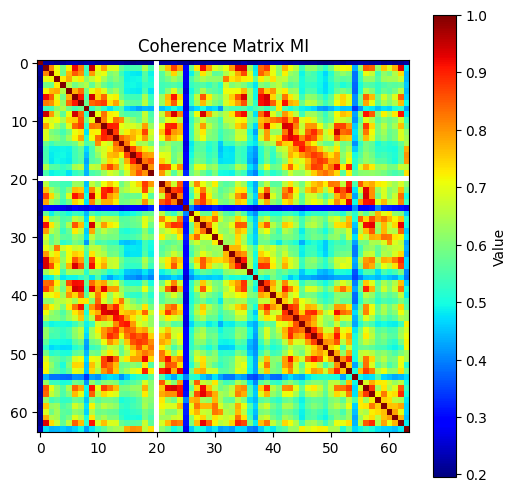

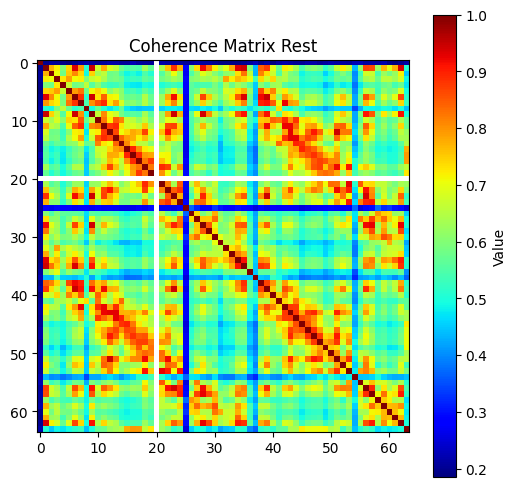

Setting up band-pass filter from 7 - 35 Hz

IIR filter parameters
---------------------
Butterworth bandpass zero-phase (two-pass forward and reverse) non-causal filter:
- Filter order 20 (effective, after forward-backward)
- Cutoffs at 7.00, 35.00 Hz: -6.02, -6.02 dB

Setting up band-pass filter from 7 - 35 Hz

IIR filter parameters
---------------------
Butterworth bandpass zero-phase (two-pass forward and reverse) non-causal filter:
- Filter order 20 (effective, after forward-backward)
- Cutoffs at 7.00, 35.00 Hz: -6.02, -6.02 dB



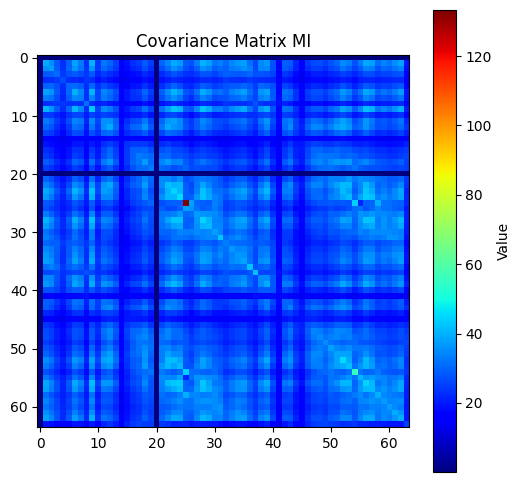

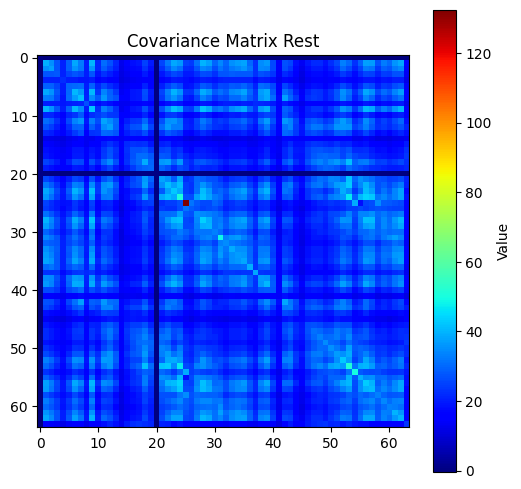

In [26]:

print(np.array(trials_MI).shape)
coh_MI = np.array(trials_MI)[:,:,:,13:30].mean(3)
coh_Rest = np.array(trials_Rest)[:,:,:,13:30].mean(3)


plt.figure(figsize=(6, 6))
plt.imshow(coh_MI.mean(0), cmap='jet')
plt.colorbar(label='Value')
plt.title('Coherence Matrix MI')
plt.figure(figsize=(6, 6))
plt.imshow(coh_Rest.mean(0), cmap='jet')
plt.colorbar(label='Value')
plt.title('Coherence Matrix Rest')
plt.show()



## Covariance part

Signal_MI_cov = mne.filter.filter_data(Signal_MI[:,:,:],500,7,35,fir_window = 'hann',method='iir',iir_params=iir_params)
Signal_Rest_cov = mne.filter.filter_data(Signal_Rest[:,:,:],500,7,35,fir_window = 'hann',method='iir',iir_params=iir_params)

cov_data_train_MI = Covariances(estimator = 'oas').transform(Signal_MI_cov[:,:,:])
cov_data_train_Rest = Covariances(estimator = 'oas').transform(Signal_Rest_cov[:,:,:])

plt.figure(figsize=(6, 6))
plt.imshow(cov_data_train_MI.mean(0), cmap='jet')
plt.colorbar(label='Value')
plt.title('Covariance Matrix MI')
plt.figure(figsize=(6, 6))
plt.imshow(cov_data_train_Rest.mean(0), cmap='jet')
plt.colorbar(label='Value')
plt.title('Covariance Matrix Rest')
plt.show()


Creating the network based on the matrix with threshold

In [27]:
Thresh_Cov = 40
Thresh_Coh = 0.7
cov_data_train_MI_thresh = (cov_data_train_MI.mean(0)>Thresh_Cov).astype(int)
cov_data_train_Rest_thresh = (cov_data_train_Rest.mean(0)>Thresh_Cov).astype(int)

coh_MI_thres = (coh_MI.mean(0)>Thresh_Coh).astype(int)
coh_Rest_thres = (coh_Rest.mean(0)>Thresh_Coh).astype(int)

plotting the resulting networks

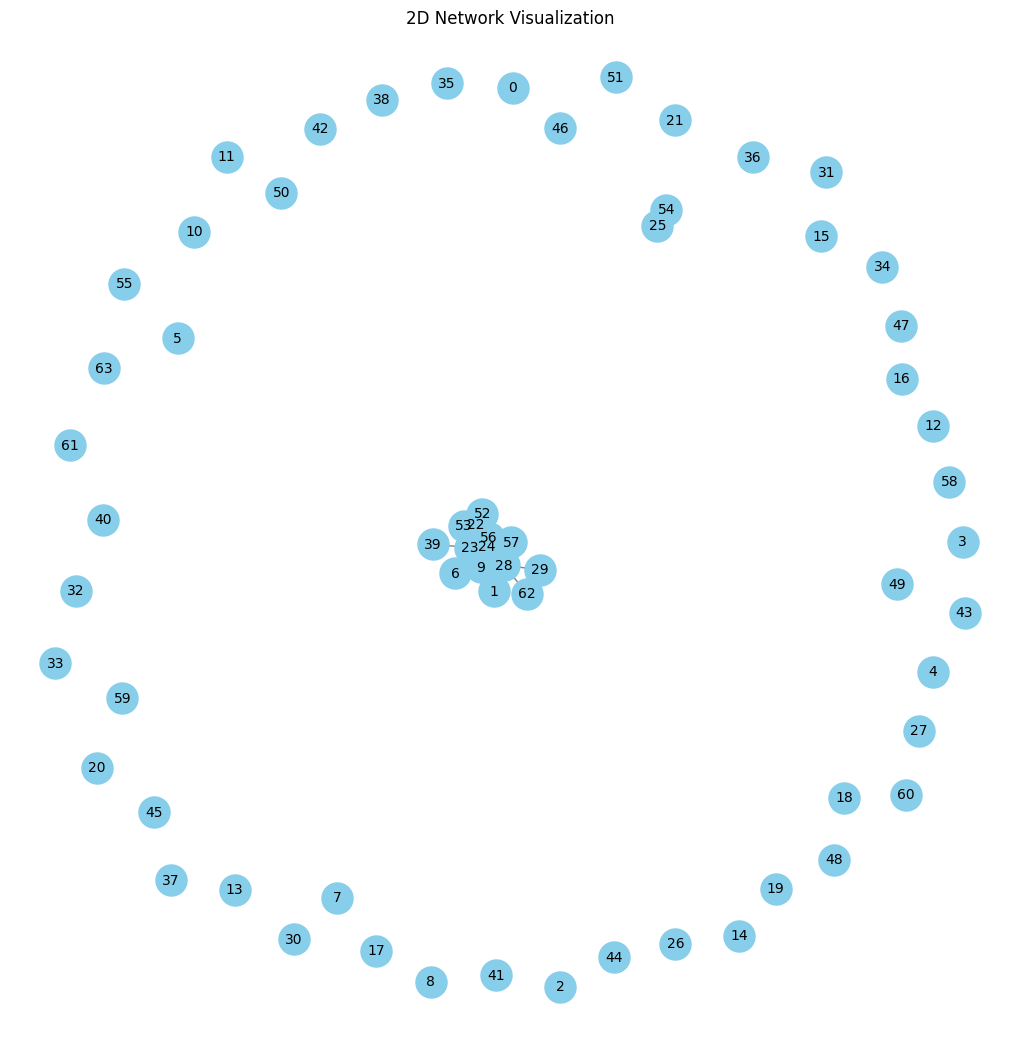

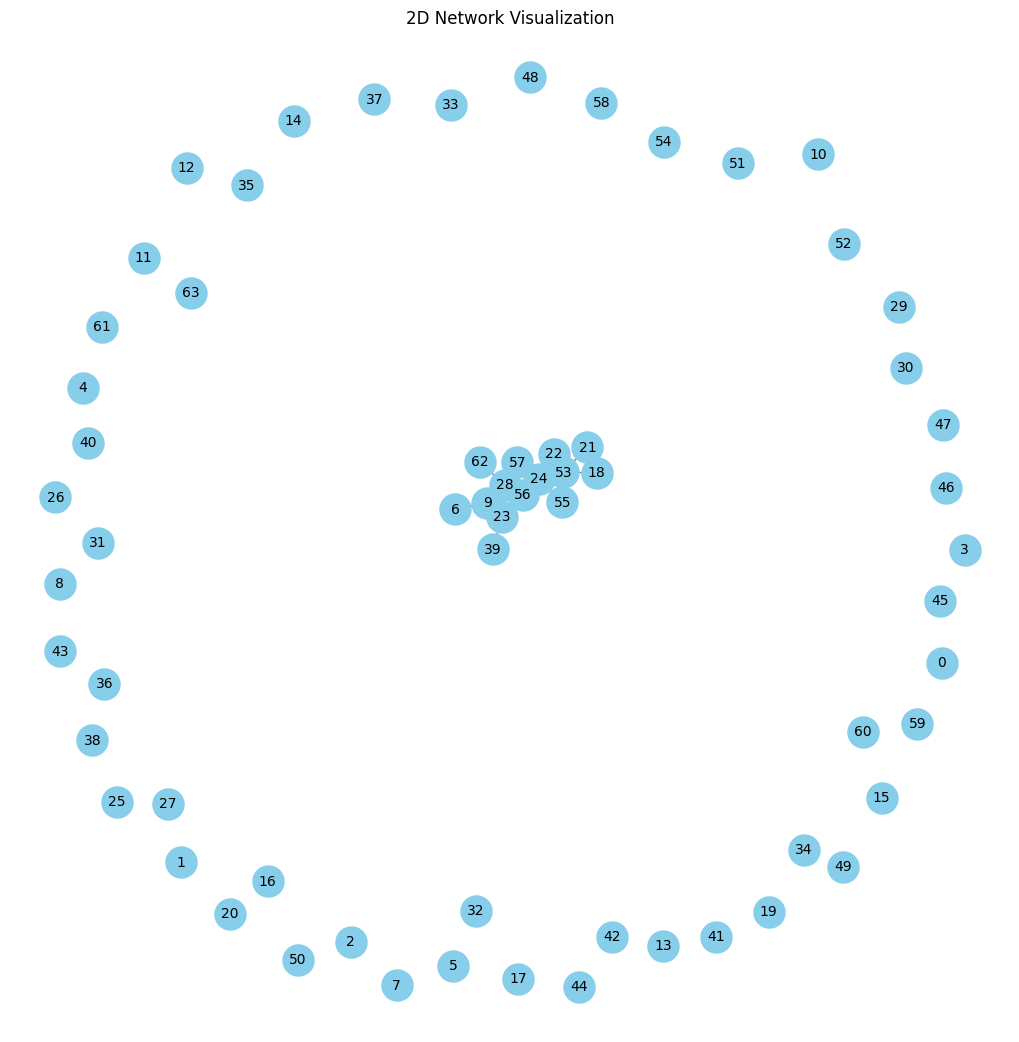

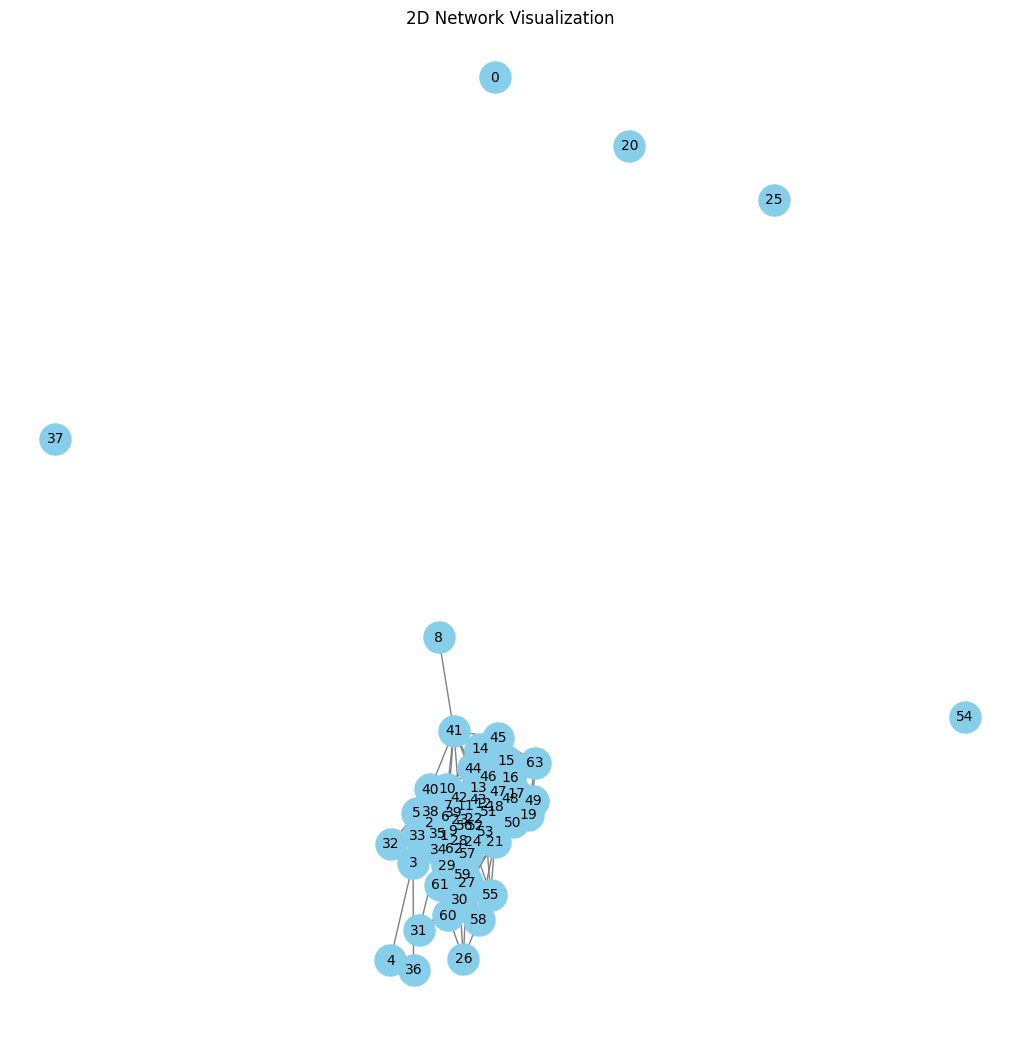

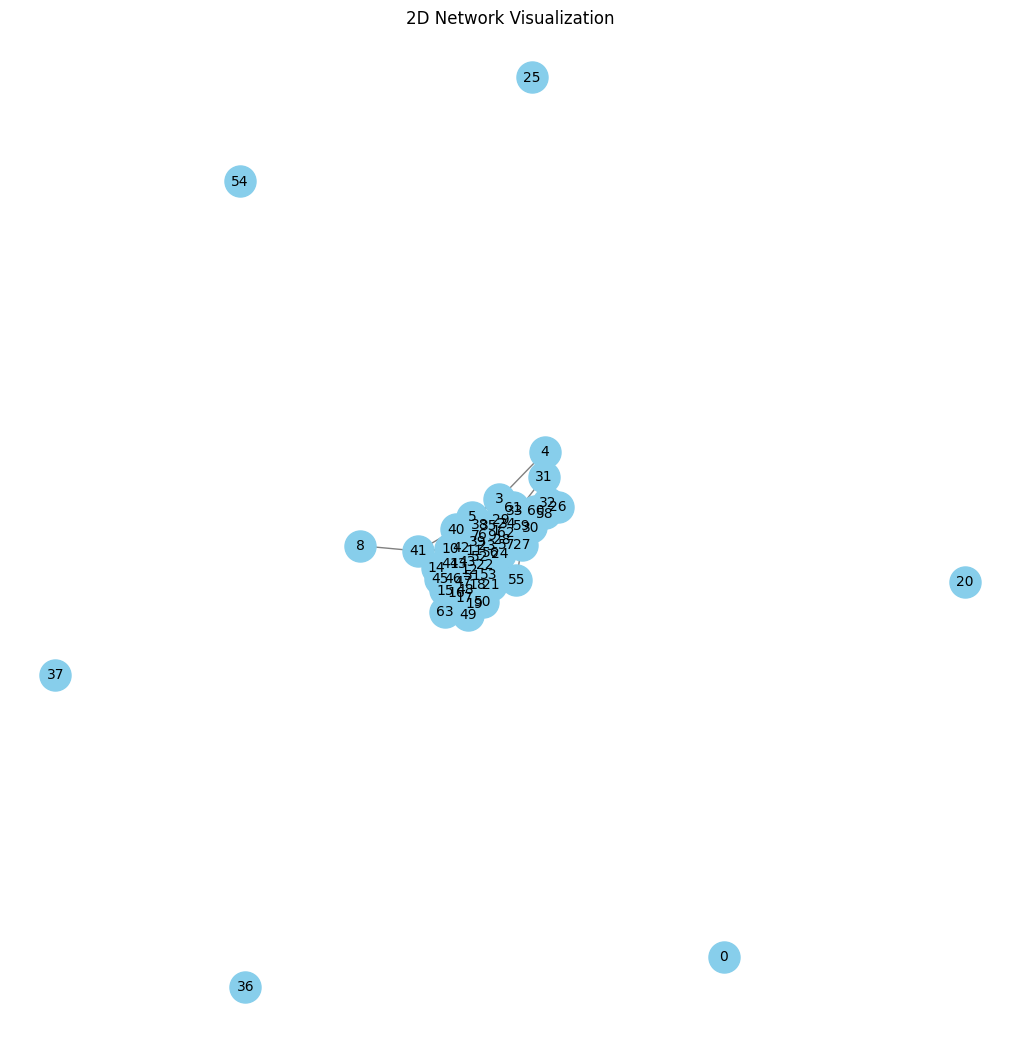

In [37]:
np.fill_diagonal(cov_data_train_MI_thresh, 0)
np.fill_diagonal(cov_data_train_Rest_thresh, 0)

np.fill_diagonal(coh_MI_thres, 0)
np.fill_diagonal(coh_Rest_thres, 0)


G_covariance_MI = nx.from_numpy_array(cov_data_train_MI_thresh)
G_covariance_Rest = nx.from_numpy_array(cov_data_train_Rest_thresh)

G_coh_MI = nx.from_numpy_array(coh_MI_thres)
G_coh_Rest = nx.from_numpy_array(coh_Rest_thres)

plot_network_2d(G_covariance_MI)
plot_network_2d(G_covariance_Rest)

plot_network_2d(G_coh_MI)
plot_network_2d(G_coh_Rest)